# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [185]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

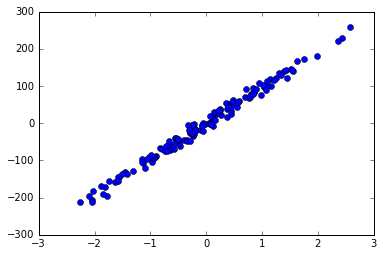

In [186]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
# plt.plot(x1,y1,'o')

############### More DATASETS

noise = 10 #Standard deviation of added Gaussian noise
n_samples = 150 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x2,y2) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x2_test,y2_test) = make_regression(n_samples=75, n_features=n_dimensions, noise=noise)
plt.plot(x2,y2,'o')

noise = 100 #Standard deviation of added Gaussian noise
n_samples = 200 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x3,y3) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x3_test,y3_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=noise)

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

0.904755322847


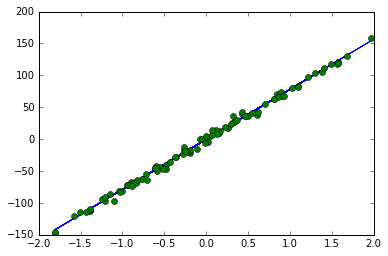

0.177793506013


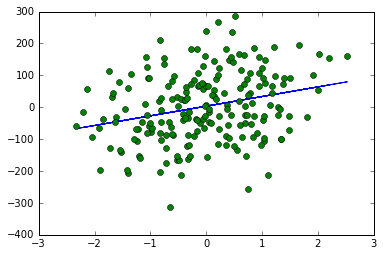

In [187]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

################
from sklearn.linear_model import LinearRegression

regr2 = LinearRegression()

regr2.fit(x3,y3)

print regr2.score(x3_test,y3_test)

#Plot the resulting line
plt.plot(x3,regr2.predict(x3))
plt.plot(x3,y3,'o')
plt.show()


## Your analysis


As the amount of noise increses in the plot, the score gets closer to 0. This makes sense because a plot with almost all noise, should have a very low score for the fit of the regression.

Populating the interactive namespace from numpy and matplotlib


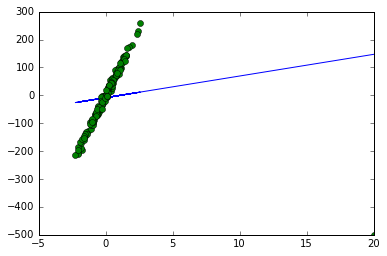

In [203]:
%pylab inline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#Add a serious outlier and see what happens

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)

#Example of creating big outlier:
x2[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y2[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
regr = LinearRegression()
regr.fit(x2,y2)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [189]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
#   This function is relatively simply. Take all the theta values and create a new array filled 
#    with the prediction function applied to each value in the original input-array
    return np.add(theta0, np.multiply(theta1,x))


In [190]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
#     1/2m
    coeff = 1/(2.0 * float(size(x_predict)))
#     Subtract element-wise y-values from the prediction function, square those values and sum the total
#       to get the cost, divide by the number of elements to get the approx mean-squared average error
    return coeff * np.sum(np.square(np.subtract(x_predict, y)))


In [191]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y , x):
#     1/m
    coeff = 1/float(size(x_predict))
#     new theta0 gradient value
    grad0 = coeff * np.sum(np.subtract(x_predict, y))
#     new theta1 gradient value
    grad1 = coeff * np.sum(np.multiply(np.subtract(x_predict, y), x))
    return grad0,grad1
      

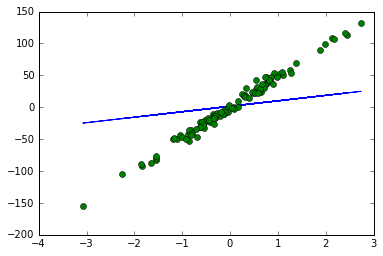

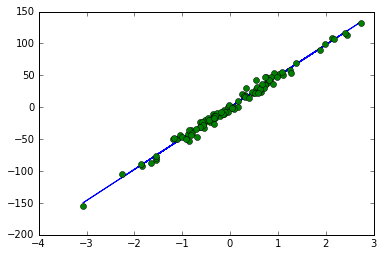

In [202]:
#These are some default parameters, see how playing with them affects the behavior
alpha = .1
theta0 = 0
theta1 = 1.0
x = x1
y = y1
iterations = 10
#Fill in the stopcondition yourself
stopcondition = 5

i = 0
cost = 10
costvalues = []
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    i = i + 1
    x_predict = np.transpose(prediction_function(x, theta0, theta1))
    cost = cost_function(x_predict, y)
    costvalues.append(cost)
    grad0,grad1 = compute_gradient(x_predict, y, x)
    theta0 = theta0 - alpha * grad0
    theta1 = theta1 - alpha * grad1

plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

################
from sklearn.linear_model import LinearRegression

regr2 = LinearRegression()
regr2.fit(x1,y1)

#Plot the resulting line
plt.plot(x1,regr2.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function:

The number of iterations is completely dependent on the data being worked with, thus the importance of the stop condition to terminate the iterating when the regression is close enough rather. With a perfectly sized learning rate for the particular problem, less iterations are needed. However with a learning rate that is either too large or far too small, the number of iterations begins to be irrelavant in importance compared to the step size. Regardless of these other parameters, the cost function should have a continuous downward trend, this indicates that the regression is fitting more and more closely each iteration, and thus you are apporaching a minimum in the cost function. If the cost function tends to 0 then you have found a perfect regression, but more likely it will decrease by smaller and smaller amounts until you have found a local minimum.

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.